We'll be working with some California Census Data, we'll be trying to use various features of an individual to predict what class of income they belogn in (>50k or <=50k). 

Here is some information about the data:
<img src="info.png" />

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


### Training Data :

In [2]:
data = pd.read_csv("census_data.csv")

In [3]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


As the tensor flow cant not understand labels in string we need to convert them into numerical classes (0 and 1 for binary classification)

In [4]:
data["income_bracket"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [5]:
data["income_bracket"].isnull().sum()

0

In [6]:
# Label converter function:
def set_label(x):
    if x == " <=50K":
        return 0
    else:
        return 1

In [7]:
data["income_bracket"] = data["income_bracket"].apply(set_label)

In [8]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [9]:
data.shape

(32561, 14)

## Data Visualization:

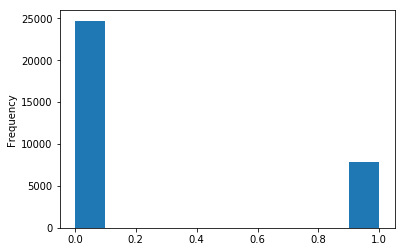

In [9]:
data["income_bracket"].plot.hist(bins=10) # We can clearly see that class 0 has more example than class a in training data

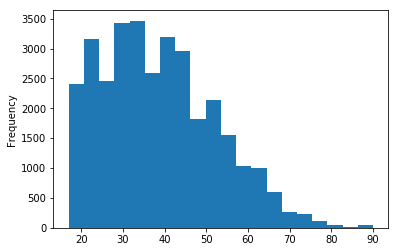

In [10]:
data["age"].plot.hist(bins=20)

<BarContainer object of 32561 artists>

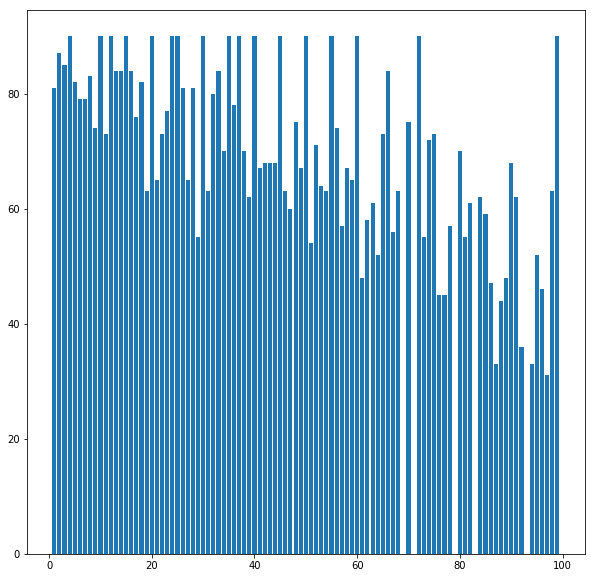

In [52]:
plt.figure(figsize=(10,10))
plt.bar(data['hours_per_week'],data['age'])

### Train Test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data.drop("income_bracket",axis = 1)

In [12]:
y = data["income_bracket"]

In [13]:
X.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_bracket, dtype: int64

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [16]:
X_train.shape

(22792, 13)

In [17]:
X_train.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_bracket    32561 non-null int64
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [19]:
col_cat = [ 'workclass', 'education', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'native_country']

In [20]:
col_num = ['age','education_num','capital_gain',
       'capital_loss', 'hours_per_week']

In [29]:
# Checking the unique values in columns for hash bucket
dim =[]
for i in  col_cat:
    print(i)
    print(data[i].unique().size)
    dim.append(data[i].unique().size)
    print('\n')

workclass
9


education
16


marital_status
7


occupation
15


relationship
6


race
5


gender
2


native_country
42




In [30]:
dim

[9, 16, 7, 15, 6, 5, 2, 42]

In [26]:
# Creating Categorical feature columns 
wc = tf.feature_column.categorical_column_with_hash_bucket(col_cat[0],hash_bucket_size=10)
edu = tf.feature_column.categorical_column_with_hash_bucket(col_cat[1],hash_bucket_size=20)
ms = tf.feature_column.categorical_column_with_hash_bucket(col_cat[2],hash_bucket_size=10)
occ = tf.feature_column.categorical_column_with_hash_bucket(col_cat[3],hash_bucket_size=20)
real = tf.feature_column.categorical_column_with_hash_bucket(col_cat[4],hash_bucket_size=10)
race = tf.feature_column.categorical_column_with_hash_bucket(col_cat[5],hash_bucket_size=10)
gender = tf.feature_column.categorical_column_with_hash_bucket(col_cat[6],hash_bucket_size=3)
nat_con = tf.feature_column.categorical_column_with_hash_bucket(col_cat[7],hash_bucket_size=45)

In [23]:
# Creating Numerical columns

age = tf.feature_column.numeric_column(col_num[0])
edu_num = tf.feature_column.numeric_column(col_num[1])
cpt_gain = tf.feature_column.numeric_column(col_num[2])
cpt_loss = tf.feature_column.numeric_column(col_num[3])
hpw = tf.feature_column.numeric_column(col_num[4])

### As The DNN classifier cant use categorical columns we need to use embeddings

In [31]:
# Creating embeddings of categorical features
wc_emb = tf.feature_column.embedding_column(wc,dimension=dim[0])
edu_emb = tf.feature_column.embedding_column(edu,dimension=dim[1])
ms_emb = tf.feature_column.embedding_column(ms,dimension=dim[2])
occ_emb = tf.feature_column.embedding_column(occ,dimension=dim[3])
real_emb = tf.feature_column.embedding_column(real,dimension=dim[4])
race_emb = tf.feature_column.embedding_column(race,dimension=dim[5])
gender_emb = tf.feature_column.embedding_column(gender,dimension=dim[6])
nat_con_emb = tf.feature_column.embedding_column(nat_con,dimension=dim[7])

In [32]:
features= [age,edu_num,cpt_gain,cpt_loss,hpw,wc_emb,edu_emb,ms_emb,occ_emb,real_emb,race_emb,gender_emb,nat_con_emb]

In [33]:
# Input function for training
input_fun_train = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=200,num_epochs=1000,shuffle=True)

In [34]:
# Input function for evalution
input_fun_eval = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=200,num_epochs=1,shuffle=False)

In [35]:
model_DNN = tf.estimator.DNNClassifier([13,13,13,13],feature_columns=features,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\cheta\\AppData\\Local\\Temp\\tmpeu_1d0ae', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BD47548BE0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [42]:
model_DNN.train(input_fn=input_fun_train,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cheta\AppData\Local\Temp\tmpeu_1d0ae\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cheta\AppData\Local\Temp\tmpeu_1d0ae\model.ckpt.
INFO:tensorflow:loss = 49.24441, step = 11001
INFO:tensorflow:global_step/sec: 54.0979
INFO:tensorflow:loss = 63.36199, step = 11101 (1.851 sec)
INFO:tensorflow:global_step/sec: 122.726
INFO:tensorflow:loss = 52.76559, step = 11201 (0.816 sec)
INFO:tensorflow:global_step/sec: 133.157
INFO:tensorflow:loss = 57.70043, step = 11301 (0.748 sec)
INFO:tensorflow:global_step/sec: 131.068
INFO:tensorflow:loss = 72.3068, step = 11401 (0.764 sec)
INFO:tensorflow:global_step/sec: 117.962
INFO:tensorflow:loss = 67.84422, step = 11501 (0.848 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 110.67
INFO:tensorflow:loss = 54.74801, step = 18901 (0.904 sec)
INFO:tensorflow:global_step/sec: 121.975
INFO:tensorflow:loss = 71.24484, step = 19001 (0.818 sec)
INFO:tensorflow:global_step/sec: 134.047
INFO:tensorflow:loss = 80.73773, step = 19101 (0.749 sec)
INFO:tensorflow:global_step/sec: 116.59
INFO:tensorflow:loss = 56.340923, step = 19201 (0.854 sec)
INFO:tensorflow:global_step/sec: 124.247
INFO:tensorflow:loss = 52.829414, step = 19301 (0.809 sec)
INFO:tensorflow:global_step/sec: 117.409
INFO:tensorflow:loss = 55.517014, step = 19401 (0.848 sec)
INFO:tensorflow:global_step/sec: 121.98
INFO:tensorflow:loss = 64.70309, step = 19501 (0.821 sec)
INFO:tensorflow:global_step/sec: 128.055
INFO:tensorflow:loss = 54.92183, step = 19601 (0.780 sec)
INFO:tensorflow:global_step/sec: 120.366
INFO:tensorflow:loss = 62.016457, step = 19701 (0.831 sec)
INFO:tensorflow:global_step/sec: 126.119
INFO:tensorflow:loss = 56.68051, step = 19801 (0.793 sec)
INFO:tens

In [44]:
performance = model_DNN.evaluate(input_fn=input_fun_eval)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-15T19:03:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cheta\AppData\Local\Temp\tmpeu_1d0ae\model.ckpt-21000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-15-19:03:42
INFO:tensorflow:Saving dict for global step 21000: accuracy = 0.8526973, accuracy_baseline = 0.7642543, auc = 0.90669554, auc_precision_recall = 0.7716397, average_loss = 0.32037172, global_step = 21000, label/mean = 0.23574573, loss = 63.87166, precision = 0.7123894, prediction/mean = 0.24969792, recall = 0.62917936
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 21000: C:\Users\cheta\AppData\Local\Temp\tmpeu_1d0ae\model.ckpt-21000


In [45]:
performance

{'accuracy': 0.8526973,
 'accuracy_baseline': 0.7642543,
 'auc': 0.90669554,
 'auc_precision_recall': 0.7716397,
 'average_loss': 0.32037172,
 'label/mean': 0.23574573,
 'loss': 63.87166,
 'precision': 0.7123894,
 'prediction/mean': 0.24969792,
 'recall': 0.62917936,
 'global_step': 21000}